In [31]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies (1).csv


In [32]:
import pandas as pd
df= pd.read_csv('movies.csv')
df.shape

(9742, 3)

In [33]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings (1).csv


In [34]:
df1= pd.read_csv('ratings.csv')
df1.shape

(100836, 4)

In [35]:
unique_user_ids =df1['userId'].nunique()

In [36]:
print(unique_user_ids)

610


In [37]:

# Count the number of ratings for each movie
movie_rating_counts = df1['movieId'].value_counts()

# Identify the movie with the maximum number of ratings
most_rated_movie_id = movie_rating_counts.idxmax()
most_rated_count = movie_rating_counts.max()

print(f'The movie with the maximum number of ratings has movieId: {most_rated_movie_id} with {most_rated_count} ratings.')


The movie with the maximum number of ratings has movieId: 356 with 329 ratings.


In [38]:

# Merge the most-rated movieId with the movies DataFrame to get the title
most_rated_movie_title = df[df['movieId'] == most_rated_movie_id]['title'].values[0]

print(f'The movie with the maximum number of ratings is "{most_rated_movie_title}" with {most_rated_count} ratings.')


The movie with the maximum number of ratings is "Forrest Gump (1994)" with 329 ratings.


In [39]:
from google.colab import files
uploaded = files.upload()

Saving tags.csv to tags (1).csv


In [40]:

movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')

matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

tags_for_matrix = tags_df[tags_df['movieId'] == matrix_movie_id]

unique_tags = tags_for_matrix['tag'].unique()

print(f'The tags submitted by users for "Matrix, The (1999)" are: {unique_tags}')


The tags submitted by users for "Matrix, The (1999)" are: ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [41]:

ratings_df = pd.read_csv('ratings.csv')

terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

ratings_for_terminator = ratings_df[ratings_df['movieId'] == terminator_movie_id]

average_rating = ratings_for_terminator['rating'].mean()

print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is: {average_rating}')


The average user rating for "Terminator 2: Judgment Day (1991)" is: 3.970982142857143


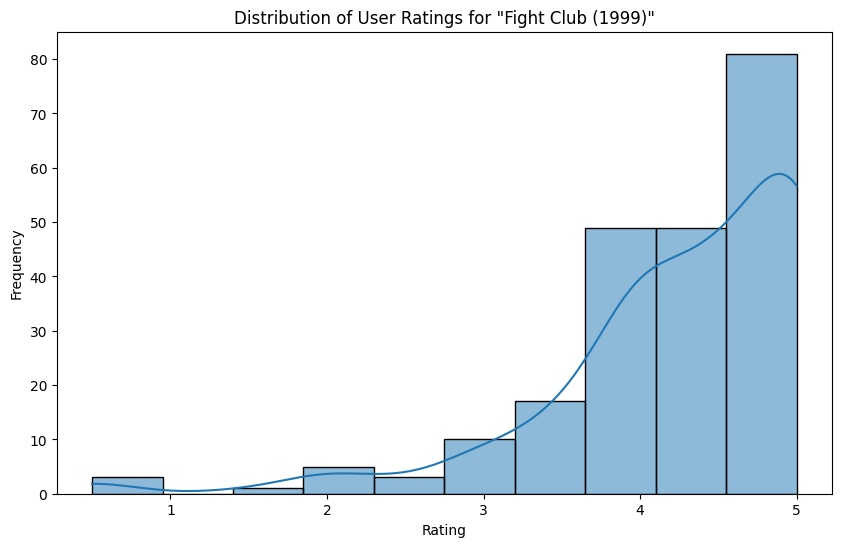

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

ratings_for_fight_club = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

plt.figure(figsize=(10, 6))
sns.histplot(ratings_for_fight_club['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [43]:
import pandas as pd

# Load the data files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Step 1: Group by movieId and calculate count and mean of ratings
ratings_grouped = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Step 2: Perform inner join with movies data
merged_df = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Display the resulting DataFrame
print(filtered_df)


      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  \
0     Adventure|Animation|Children|Comedy|Fantasy           215   
1                      Adventure|Children|Fantasy           110   
2                                  Comedy|Romance            52   
5                           Action|Crime|Thriller           102   
6                                  Comedy|Romance   

In [44]:

# Find the movie with the highest average rating
most_popular_movie = filtered_df.loc[filtered_df['average_rating'].idxmax()]

# Display the result
most_popular_movie_title = most_popular_movie['title']
most_popular_movie_rating = most_popular_movie['average_rating']

print(f'The most popular movie based on average user ratings is "{most_popular_movie_title}" with an average rating of {most_popular_movie_rating:.2f}.')


The most popular movie based on average user ratings is "Shawshank Redemption, The (1994)" with an average rating of 4.43.


In [45]:

# Sort by rating count and get the top 5 movies
top_5_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 movies
print(top_5_movies[['title', 'rating_count']])


                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278
